# Homework - Linear Regression with Gapminder data

## Introduction

you will work with Gapminder data that we have consolidated into one CSV file available in the workspace as 'gapminder.csv'. Specifically, your goal will be to use this data to predict the life expectancy in a given country based on features such as the country's GDP, fertility rate, and population.

## Exercise 1: 
Follow the instructions to implement the following codes

* Import numpy and pandas as their standard aliases.
* Read the file `'gapminder.csv'` into a DataFrame df using the `read_csv()` function.
* Create array `X_fertility` for the `'fertility'` feature and array `y` for the `'life'` target variable.
* Reshape the arrays by using the `.reshape()` method and passing in `-1` and `1`.

In [6]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Read the CSV file into a DataFrame: df
df = pd.read_csv('gapminder.csv')

# Create arrays for features and target variable
y = df['life']
X_fertility = df['fertility']

# Print the dimensions of X_fertility and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X_fertility.shape))

# Reshape X_fertility and y
y = y.values.reshape([-1, 1])
X_fertility = X_fertility.values.reshape([-1, 1])

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X_fertility after reshaping: {}".format(X_fertility.shape))


Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)
Dimensions of y after reshaping: (139, 1)
Dimensions of X_fertility after reshaping: (139, 1)


## Exercise 2: 
Follow the instructions to implement the following codes

* Import `LinearRegression` from `sklearn.linear_model`.
* Create a `LinearRegression` regressor called `reg`.
* Set up the prediction space to range from the minimum to the maximum of `X_fertility`. This has been done for you.
* Fit the regressor to the data (`X_fertility` and y) and compute its predictions using the `.predict()` method and the prediction_space array.
* Compute and print the R2 score using the `.score()` method.
* Overlay the plot with your linear regression line. This has been done for you,

0.6192442167740035


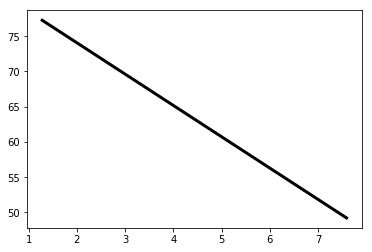

In [9]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility, y))

# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()

## Exercise 3: 
Follow the instructions to implement the following codes

* Import `LinearRegression` from `sklearn.linear_model`, `mean_squared_error` from `sklearn.metrics`, and `train_test_split` from `sklearn.model_selection`.
* Creat `X` and reload `y`, this has been done for you. 
* Using `X` and `y`, create training and test sets such that `30%` is used for testing and `70%` for training. Use a random state of `42`.
* Create a linear regression regressor called `reg_all`, fit it to the training set, and evaluate it on the test set.
* Compute and print the R2 score using the `.score()` method on the test set.
* Compute and print the RMSE. To do this, first compute the Mean Squared Error using the `mean_squared_error()` function with the arguments `y_test` and `y_pred`, and then take its square root using `np.sqrt()`

In [10]:
# Import necessary modules
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load X and y
y = df['life'].values
X = df.drop(['life','Region'],axis=1).values

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(reg_all.score(X_test, y_test))
print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.8380468731430135
Root Mean Squared Error: 0.915449000842217


## Exercise 4: 
Follow the instructions to implement the following codes
* Import LinearRegression from sklearn.linear_model and cross_val_score from sklearn.model_selection.
* Create a linear regression regressor called reg.
* Use the `cross_val_score()` function to perform 5-fold cross-validation on `X` and `y`.
* Compute and print the average cross-validation score. You can use NumPy's mean() function to compute the average.

In [15]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv = 5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))


[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]
Average 5-Fold CV Score: 0.8599627722793454


## Exercise 5: 
Follow the instructions to implement the following codes

* Import `Lasso` from `sklearn.linear_model`.
* Instantiate a Lasso regressor with an alpha of `0.4`.
* Fit the regressor to the data and compute the coefficients using the `coef_` attribute.
* Plot the coefficients on the y-axis and column names on the x-axis. This has been done for you,

[-1.58817700e-09 -0.00000000e+00 -5.42346807e-01 -1.03724331e-01
  0.00000000e+00  1.27153178e-04 -1.97639517e-01 -1.19436470e-01]


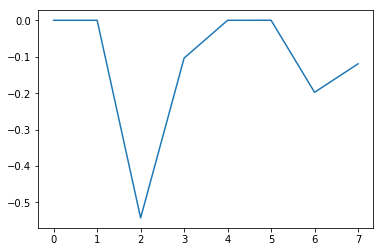

In [17]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso()

# Fit the regressor to the data
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(lasso_coef)

## Exercise 6: 
Follow the instructions to implement the following codes

* Instantiate a Ridge regressor and specify `normalize=True`.
* Inside the `for` loop:
  * Specify the alpha value for the regressor to use.
  * Perform 10-fold cross-validation on the regressor with the specified alpha. The data is available in the arrays `X` and `y`.
  * Append the average and the standard deviation of the computed cross-validated scores. NumPy has been pre-imported for you as `np`.
* Use the `display_plot()` function to visualize the scores and standard deviations. This has been done for you. 

/home/nghia-nguyen/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.718706e-17
  overwrite_a=True).T
/home/nghia-nguyen/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.732112e-17
  overwrite_a=True).T
/home/nghia-nguyen/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.155609e-17
  overwrite_a=True).T
/home/nghia-nguyen/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal con

/home/nghia-nguyen/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.720238e-17
  overwrite_a=True).T
/home/nghia-nguyen/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.733644e-17
  overwrite_a=True).T
/home/nghia-nguyen/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.157135e-17
  overwrite_a=True).T
/home/nghia-nguyen/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal con

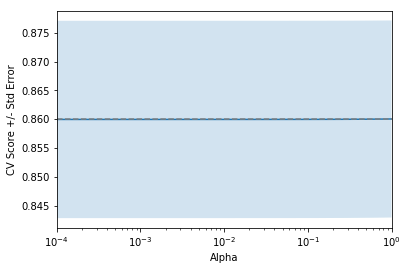

In [27]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge()

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv = 5)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))
# Define display_plot 
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

# Display the plot
display_plot(ridge_scores, ridge_scores_std)